In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import json
%matplotlib inline

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
# learned from youtube video brandon rhodes on pandas

In [57]:
df = pd.read_csv('data/bulls1996.csv')

In [24]:
ast_reb_wonw= df[(df['AST']>df['AST.1']) & (df['TRB']>df['TRB.1'])]

In [58]:
df

,Rk,G,Date,Unnamed: 3,Opp,W/L,Tm,Opp.1,FG,FGA,...,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,1,1,1995-11-03,NaN,CHH,W,105,91,43,86,...,16,25,0.640,14,43,14,8,4,19,22
1,2,2,1995-11-04,NaN,BOS,W,107,85,43,88,...,25,43,0.581,11,44,17,7,4,25,24
2,3,3,1995-11-07,NaN,TOR,W,117,108,44,80,...,30,37,0.811,7,32,25,6,3,19,26
3,4,4,1995-11-09,@,CLE,W,106,88,41,79,...,19,23,0.826,9,34,27,9,1,9,18
4,5,5,1995-11-11,NaN,POR,W,110,106,40,81,...,18,30,0.600,15,40,23,4,1,17,25
5,6,6,1995-11-14,@,ORL,L,88,94,35,89,...,25,34,0.735,7,38,13,9,8,24,23
6,7,7,1995-11-15,NaN,CLE,W,113,94,43,77,...,14,21,0.667,11,33,22,9,2,21,25
7,8,8,1995-11-17,NaN,NJN,W,109,94,45,87,...,25,32,0.781,11,35,20,10,5,20,22
8,9,9,1995-11-21,@,DAL,W,108,102,42,93,...,22,31,0.710,32,66,22,8,5,15,25
9,10,10,1995-11-22,@,SAS,W,103,94,41,92,...,27,39,0.692,11,42,20,8,10,16,22


In [25]:
ast_reb_wonww= df[(df['AST']>df['AST.1']) & (df['TRB']>df['TRB.1']) & (df['W/L']=='W')]

In [27]:
ast_reb_wonww.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 79
Data columns (total 41 columns):
Rk             50 non-null int64
G              50 non-null int64
Date           50 non-null object
Unnamed: 3     19 non-null object
Opp            50 non-null object
W/L            50 non-null object
Tm             50 non-null int64
Opp.1          50 non-null int64
FG             50 non-null int64
FGA            50 non-null int64
FG%            50 non-null float64
3P             50 non-null int64
3PA            50 non-null int64
3P%            50 non-null float64
FT             50 non-null int64
FTA            50 non-null int64
FT%            50 non-null float64
ORB            50 non-null int64
TRB            50 non-null int64
AST            50 non-null int64
STL            50 non-null int64
BLK            50 non-null int64
TOV            50 non-null int64
PF             50 non-null int64
Unnamed: 24    0 non-null float64
FG.1           50 non-null int64
FGA.1          50 non-null i

In [23]:
ast_reb_won.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1 to 80
Data columns (total 41 columns):
Rk             54 non-null int64
G              54 non-null int64
Date           54 non-null object
Unnamed: 3     21 non-null object
Opp            54 non-null object
W/L            54 non-null object
Tm             54 non-null int64
Opp.1          54 non-null int64
FG             54 non-null int64
FGA            54 non-null int64
FG%            54 non-null float64
3P             54 non-null int64
3PA            54 non-null int64
3P%            54 non-null float64
FT             54 non-null int64
FTA            54 non-null int64
FT%            54 non-null float64
ORB            54 non-null int64
TRB            54 non-null int64
AST            54 non-null int64
STL            54 non-null int64
BLK            54 non-null int64
TOV            54 non-null int64
PF             54 non-null int64
Unnamed: 24    0 non-null float64
FG.1           54 non-null int64
FGA.1          54 non-null i

In [5]:
wins = df[df['W/L']=='W']
loss = df[df['W/L']=='L']
orebounds_won= df[df['ORB']>df['ORB.1']]
orebounds_loss= df[df['ORB']<df['ORB.1']]
trebounds_won= df[df['TRB']>df['TRB.1']]
trebounds_loss= df[df['TRB']<df['TRB.1']]
assist_won= df[df['AST']>df['AST.1']]
assist_loss= df[df['AST']<df['AST.1']]
turnover_w= df[df['TOV']>df['TOV.1']]
turnover_l= df[df['TOV']<df['TOV.1']]
steal_won= df[df['STL']>df['STL.1']]
steal_loss= df[df['STL']<df['STL.1']]
assist_won= df[df['AST']>df['AST.1']]
assist_loss= df[df['AST']<df['AST.1']]
blocks_won= df[df['BLK']>df['BLK.1']]
blocks_loss= df[df['BLK']<df['BLK.1']]

In [6]:
wrebounds_won=trebounds_won[trebounds_won["W/L"] =="W"]
wassist_won=assist_won[assist_won['W/L']=='W']
astreb = assist_won[assist_won['TRB'] > assist_won['TRB.1']]
astrebw = astreb[astreb['W/L']=='W']

In [7]:
wpct = (len(wrebounds_won)) / (len(trebounds_won))
wwpct = (len(wassist_won)) / (len(assist_won))
wwwpct = len(astrebw)/len(astreb)

In [8]:
print ("The Team won :", str(len(wins)), 'Games')
print ("The Team lost :", str(len(loss)), 'Games')
print ()
print ("The Team got more Assists than the Opponents:", str(len(assist_won)), 'Games')
print ("The Team got less Assists than the Opponents:", str(len(assist_loss)), 'Games')
print()
print ("The Team got more Rebounds the Opponents:", str(len(trebounds_won)), 'Games')
print ("The Team got less Rebounds by the Opponents:", str(len(trebounds_loss)), 'Games')
print()
print ("The Team got more Offensive Rebounds than the Opponents:", str(len(orebounds_won)), 'Games')
print ("The Team got less Offensive Rebounds than the Opponents:", str(len(orebounds_loss)), 'Games')
print()
print ("The Team Turned Over the Ball less than the opponents in:", str(len(trebounds_won)), 'Games')
print ("The Team Turned Over the Ball more than the opponents in:", str(len(trebounds_loss)), 'Games')
print()
print ("The Team got more Steals than the Opponents:", str(len(steal_won)), 'Games')
print ("The Team got less Steals than the Opponents:", str(len(steal_loss)), 'Games')
print()
print ("The Team got more Blocks than the Opponents:", str(len(blocks_won)), 'Games')
print ("The Team got less Blocks than the Opponents:", str(len(blocks_loss)), 'Games')
print()
print("With the edge in Rebounding in, they were able to capitalize in", str(len(wrebounds_won)), 'of' , str(len(trebounds_won)))
print('A Percentage of', str(wpct), 'percent')
print()
print("With the edge in Assist in, they were able to capitalize in", str(len(wassist_won)), 'of' , str(len(assist_won)))
print('A Percentage of', str(wwpct), 'percent')
print()
print("With the edge in Rebounding in and assist, they were able to capitalize in ", str(len(astrebw)), 'of' , str(len(astreb)))
print('A Percentage of', str(wwwpct), 'percent')



The Team won : 72 Games
The Team lost : 10 Games

The Team got more Assists than the Opponents: 67 Games
The Team got less Assists than the Opponents: 13 Games

The Team got more Rebounds the Opponents: 63 Games
The Team got less Rebounds by the Opponents: 17 Games

The Team got more Offensive Rebounds than the Opponents: 60 Games
The Team got less Offensive Rebounds than the Opponents: 20 Games

The Team Turned Over the Ball less than the opponents in: 63 Games
The Team Turned Over the Ball more than the opponents in: 17 Games

The Team got more Steals than the Opponents: 54 Games
The Team got less Steals than the Opponents: 18 Games

The Team got more Blocks than the Opponents: 38 Games
The Team got less Blocks than the Opponents: 27 Games

With the edge in Rebounding in, they were able to capitalize in 56 of 63
A Percentage of 0.8888888888888888 percent

With the edge in Assist in, they were able to capitalize in 61 of 67
A Percentage of 0.9104477611940298 percent

With the edge in 

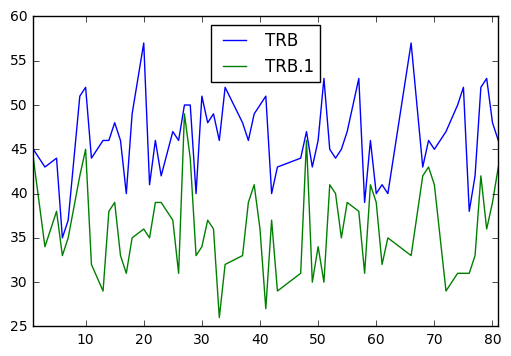

In [16]:
trebounds_won.plot(y=['TRB', 'TRB.1'])

In [43]:
df.plot(x=df.TRB.sum(), y= df.TRB.sum(), kind='pie')

IndexError: index 3658 is out of bounds for axis 0 with size 41

In [44]:
df.TRB.sum()

3658

In [46]:
df.count

<bound method DataFrame.count of     Rk   G        Date Unnamed: 3  Opp W/L   Tm  Opp.1  FG  FGA  ...   FT.1  \
0    1   1  1995-11-03        NaN  CHH   W  105     91  43   86  ...     16   
1    2   2  1995-11-04        NaN  BOS   W  107     85  43   88  ...     25   
2    3   3  1995-11-07        NaN  TOR   W  117    108  44   80  ...     30   
3    4   4  1995-11-09          @  CLE   W  106     88  41   79  ...     19   
4    5   5  1995-11-11        NaN  POR   W  110    106  40   81  ...     18   
5    6   6  1995-11-14          @  ORL   L   88     94  35   89  ...     25   
6    7   7  1995-11-15        NaN  CLE   W  113     94  43   77  ...     14   
7    8   8  1995-11-17        NaN  NJN   W  109     94  45   87  ...     25   
8    9   9  1995-11-21          @  DAL   W  108    102  42   93  ...     22   
9   10  10  1995-11-22          @  SAS   W  103     94  41   92  ...     27   
10  11  11  1995-11-24          @  UTA   W   90     85  31   76  ...     16   
11  12  12  1995-11

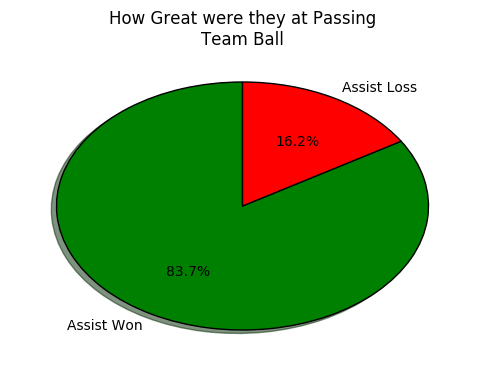

In [55]:
slices = [ len(assist_won) , len(assist_loss) ]
activities = ['Assist Won','Assist Loss']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,

        autopct='%1.1f%%')

plt.title('How Great were they at Passing\nTeam Ball')
plt.show()

In [ ]:
print ("The Team got more Assists than the Opponents:", str(len(assist_won)), 'Games')
print ("The Team got less Assists than the Opponents:", str(len(assist_loss)), 'Games')

In [ ]:
[] {}

In [56]:
(not gonna change)

SyntaxError: invalid syntax (<ipython-input-56-ff05304996f5>, line 1)